# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

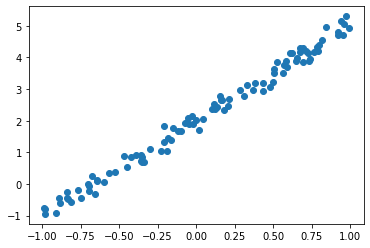

In [18]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [19]:
#Analytical model
xm=np.mean(xd)
ym=np.mean(yd)
syy=np.mean((yd-ym)**2)
syx=np.mean((yd-ym)*(xd-xm))
sxx=np.mean((xd-xm)**2)

beta1 = syx/sxx
beta0 = ym-beta1*xm
analyticalModel = np.array([beta0,beta1])

In [20]:
print(beta1)
print(beta0)

3.009989705572895
2.009758674531823


### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same. 

**Analytical Model Result**

In [21]:
#evaluate your model

# new data
# generate uniform points between -1 and 1
xplot = np.random.uniform(-1,1,nsamp);

# prediction
# get prediction on data xplot
ypredict = analyticalModel[1]*xplot + analyticalModel[0];

# fig, ax = plt.subplots()
# ax.scatter(xplot, ypredict)

**Polyfit Model Prediction**

In [22]:
polyfitModel = np.polyfit(xplot,yd,1)
yfit = np.polyval(polyfitModel,xplot)# use the polyval function to evaluate polyfitModel at x = xplot 

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

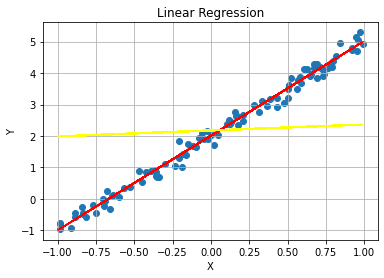

In [23]:
#plot your results
fig, ax = plt.subplots()
ax.scatter(xd, yd)

# Plot polyfit model and analytical model result:
# Your Code
ax.plot(xplot, ypredict, color='red')
ax.plot(xplot, yfit, color='yellow')

ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test. 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

train, test = train_test_split(df, test_size=0.3, random_state=25)
print(train)

        TV  radio  newspaper  sales
100  135.2   41.7       45.9   17.2
74   129.4    5.7       31.3   11.0
164  163.5   36.8        7.4   18.0
148  243.2   49.0       44.3   25.4
128   80.2    0.0        9.2    8.8
..     ...    ...        ...    ...
119  125.7   36.9       79.2   15.9
62   261.3   42.7       54.7   24.2
144  104.6    5.7       34.4   10.4
63   239.3   15.5       27.3   15.7
133    8.4   27.2        2.1    5.7

[140 rows x 4 columns]


### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [25]:
import numpy as np

sales_TV_beta     = np.polyfit(train["TV"], train["sales"], 1)
sales_newspaper_beta  = np.polyfit(train["newspaper"], train["sales"], 1)
sales_radio_beta    = np.polyfit(train["radio"], train["sales"], 1)

### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

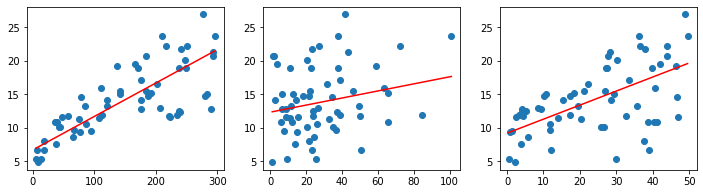

In [26]:
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
x_tv = test.sort_values(by=['TV'])
y_sales_tv = np.polyval(sales_TV_beta, x_tv["TV"])
plt.plot(x_tv["TV"], y_sales_tv, color = "red")
plt.scatter(test["TV"], test["sales"])

## Sales to newspaper spend
plt.subplot(1,3,2)
x_newspaper = test.sort_values(by=['newspaper'])
y_sales_newspaper = np.polyval(sales_newspaper_beta, x_newspaper["newspaper"])
plt.plot(x_newspaper["newspaper"], y_sales_newspaper, color = "red")
plt.scatter(test["newspaper"], test["sales"])

## Sales to radio spend
plt.subplot(1,3,3)
x_radio = test.sort_values(by=['radio'])
y_sales_radio = np.polyval(sales_radio_beta, x_radio["radio"])
plt.plot(x_radio["radio"], y_sales_radio, color = "red")
plt.scatter(test["radio"], test["sales"])


## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [27]:

# Define training X matrix
X = np.vstack((np.ones(train['newspaper'].size), train['newspaper'], train['radio'], train['TV']))
trainX = X.transpose()

# Define training Y matrix
trainY = np.vstack((train['sales']))

# Get your Model(Using the closed form in class)
multivariate_beta = np.dot(np.linalg.inv(np.dot(X, trainX)), np.dot(X, trainY))

### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [28]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = np.vstack((test['sales']))

# Predcit result using your model multivariate_beta
pred = np.dot(testX, multivariate_beta)

### Plot Result

**Q9**: Plot your predictions against real labels.

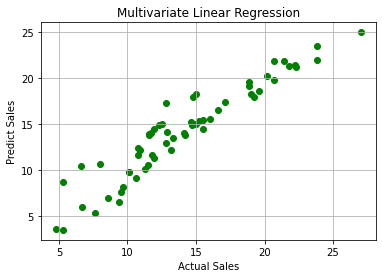

In [29]:
fig, ax = plt.subplots()

ax.scatter(testY, pred, color = "green")

ax.set(xlabel='Actual Sales', ylabel='Predict Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()